In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(type(x_train))
print(type(x_train[0]))

11490434/11490434 [==============================] - 1s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
x_train.shape == (60000,28,28)
y_train.shape == (60000,)
x_test.shape == (10000,28,28)
y_test.shape == (10000,)

True

In [4]:
print("y_train original shape", y_train.shape)
print("y_test original shape", y_test.shape)

y_train original shape (60000,)
y_test original shape (10000,)


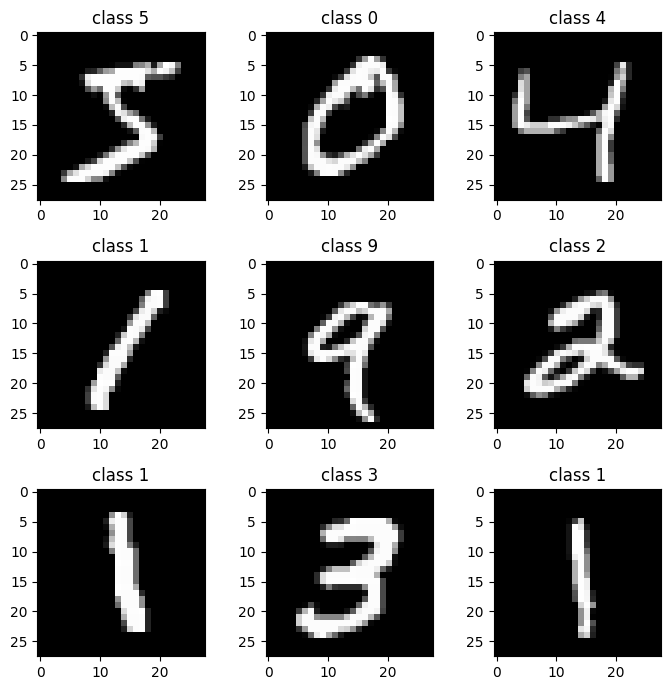

In [13]:
plt.figure(figsize=(7, 7))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap = "gray")
  plt.title("class {}".format(y_train[i]))
plt.tight_layout()

In [8]:
for i in range(0,10):
  print(y_train[i+10])

3
5
3
6
1
7
2
8
6
9


# preprocessing

In [9]:
#normalization of data (data between 0,1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
print(x_train[0].shape)

(28, 28)


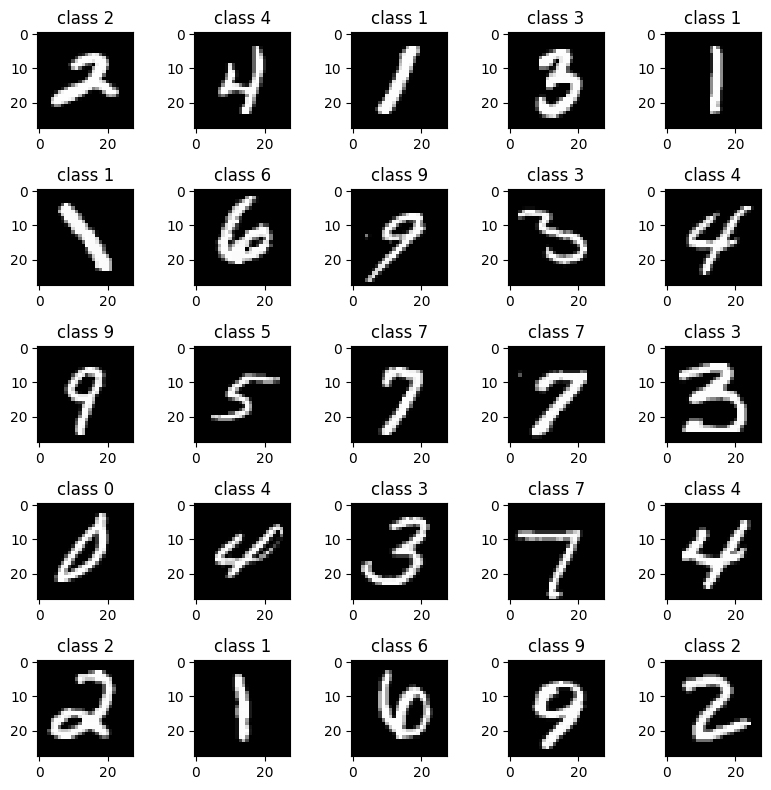

In [12]:
import random

plt.figure(figsize=(8, 8))  # Set the figure size to adjust spacing between subplots

for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    a = random.randrange(1, 1000)
    plt.imshow(x_train[a], cmap = "gray")
    plt.title("class {}".format(y_train[a]))

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

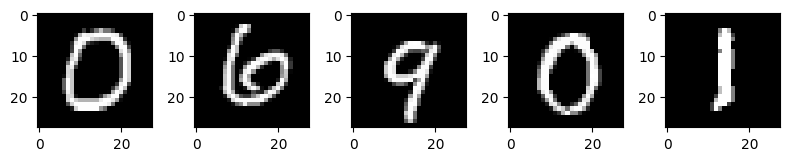

In [18]:
plt.figure(figsize=(8, 8))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[i+10], cmap = "gray")
plt.tight_layout()

In [19]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)
print(x_train[0].shape, x_test[0].shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(28, 28, 1) (28, 28, 1)


In [20]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
for i in range(0,10):
  print(y_train[i+10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Training the Network

In [22]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(10, activation = "softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

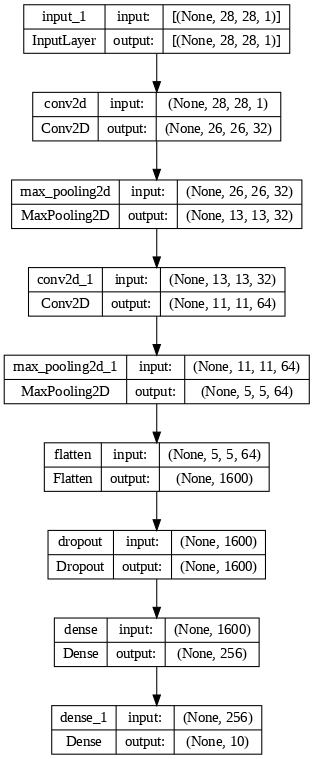

In [23]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

In [24]:
epoch = 10
batch_size = 128
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Fit the MNIST data to the created model

In [25]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 13s 6ms/step - loss: 0.2121 - accuracy: 0.9378 - val_loss: 0.0628 - val_accuracy: 0.9822
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0445 - val_accuracy: 0.9888
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0306 - val_accuracy: 0.9920
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch

Evaluation

In [26]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("achieved loss on the test_data", score[0])
print("achieved accuracy on the test date", score[1])
print(score)

achieved loss on the test_data 0.029074884951114655
achieved accuracy on the test date 0.9919999837875366
[0.029074884951114655, 0.9919999837875366]


In [27]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [28]:
print(x_test.shape)

(10000, 28, 28, 1)


In [29]:
predicted_class = model.predict(x_test)
print(predicted_class)

313/313 [==============================] - 1s 2ms/step
[[2.0229821e-10 6.9130224e-10 3.6461446e-07 ... 9.9999940e-01
  2.3556752e-09 4.2355818e-08]
 [9.7975639e-10 4.0069401e-10 1.0000000e+00 ... 3.6456888e-14
  4.7939666e-11 8.0709529e-16]
 [1.7231063e-06 9.9995840e-01 4.9647326e-07 ... 2.1472348e-05
  8.3936775e-06 2.1635701e-07]
 ...
 [5.9009596e-17 3.1690682e-13 5.2075293e-13 ... 6.4788019e-12
  2.8145064e-10 5.4949365e-11]
 [1.7528897e-09 5.7418491e-17 3.0679571e-12 ... 3.7730215e-14
  1.1593468e-03 5.1009223e-12]
 [3.3565009e-08 1.6979299e-14 1.4661843e-08 ... 2.7535358e-15
  3.9984005e-08 1.5787789e-11]]


datapoint number 0 from x_test belongs to class 7 with the probability chance of 99.99994039535522 percent


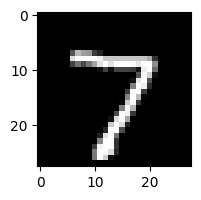

In [42]:
sample = 0
selected_class = np.argmax(predicted_class[sample])
probability = predicted_class[sample][selected_class]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[sample].reshape(28,28), cmap = "gray")


print("datapoint number {} from x_test belongs to class {} with the probability chance of {} percent".format(sample, selected_class, probability * 100))


In [45]:
print(history)
print()
print(history.history)
print()
print(history.history.keys())
print()
print(history.history["val_accuracy"])


{'loss': [0.2120591402053833, 0.06492026150226593, 0.04638607054948807, 0.03534259647130966, 0.02940063178539276, 0.02468755468726158, 0.02068081498146057, 0.019303441047668457, 0.01581655815243721, 0.014342443086206913], 'accuracy': [0.937759280204773, 0.9796666502952576, 0.9851852059364319, 0.9883888959884644, 0.990574061870575, 0.992111086845398, 0.9927963018417358, 0.9936110973358154, 0.9946666955947876, 0.9949444532394409], 'val_loss': [0.06283292919397354, 0.044464386999607086, 0.039237845689058304, 0.03976871073246002, 0.03479916602373123, 0.03057333454489708, 0.03190591558814049, 0.030986648052930832, 0.03310885280370712, 0.03588057681918144], 'val_accuracy': [0.9821666479110718, 0.9888333082199097, 0.9888333082199097, 0.9894999861717224, 0.9888333082199097, 0.9919999837875366, 0.9906666874885559, 0.9925000071525574, 0.9933333396911621, 0.9901666641235352]}

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

[0.9821666479110718, 0.9888333082199097, 0.9888333082199097

In [46]:
def plot_graphs(fitted_model, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


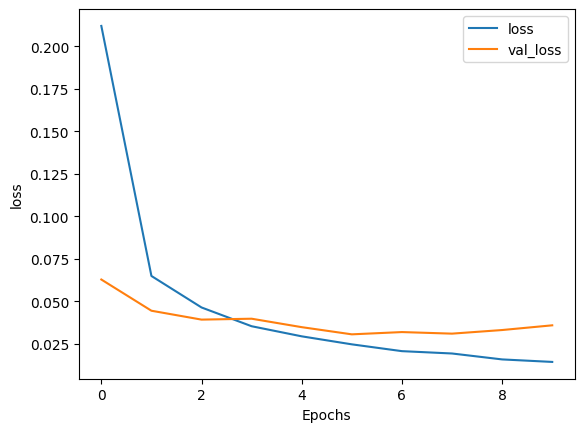

In [47]:
plot_graphs(fitted_model=history, metric='loss')

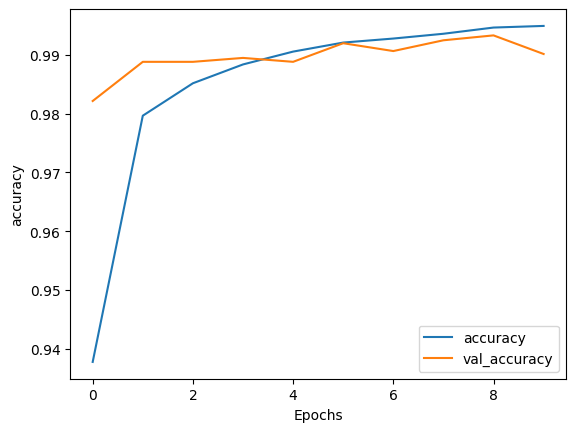

In [48]:
plot_graphs(fitted_model = history, metric = 'accuracy')

In [51]:
def class_title(example):
  selected_class = np.argmax(predicted_class[example])
  return selected_class


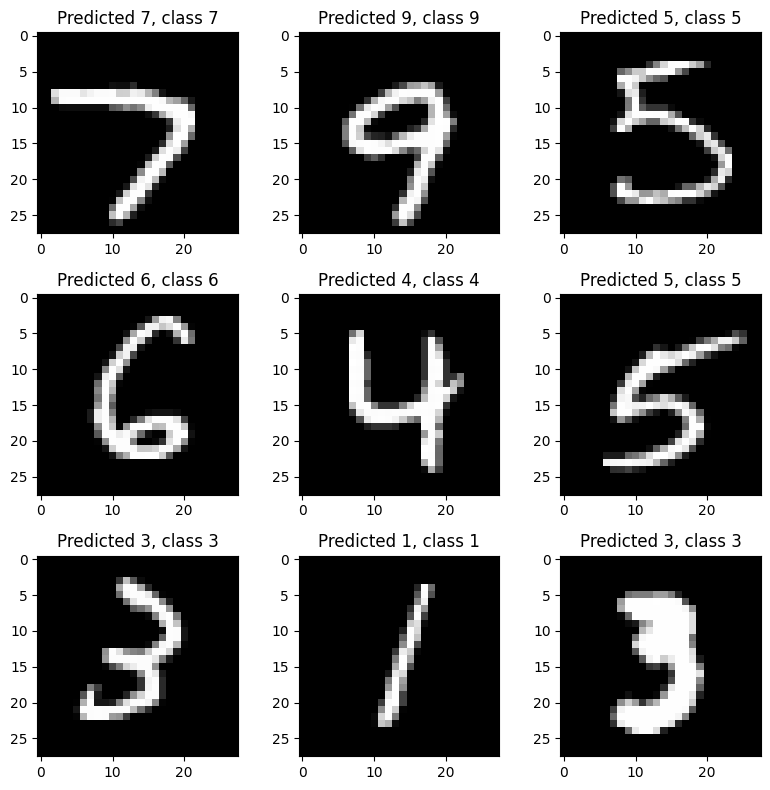

In [53]:
plt.figure(figsize=(8, 8))

for i in range(0,9):
  plt.subplot(3,3,i+1)
  example = random.randrange(1,100)
  plt.imshow(x_test[example].reshape(28,28), cmap="gray")
  y_test_original = np.argmax(y_test, axis=1)
  plt.title("Predicted {}, class {}".format(class_title(example), y_test_original[example]))

plt.tight_layout()